<a href="https://colab.research.google.com/github/HauntNT/Inteligencia-Artificial/blob/main/Cuaderno_Trabajos_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## KNN - Ejercicio #1

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [38]:
iris = pd.read_csv("drive/MyDrive/Datasets/Iris.csv") #Load Data
iris.drop('Id',inplace=True,axis=1) #Drop Id column

In [39]:
iris.head().style.background_gradient(sns.color_palette("YlOrBr", as_cmap=True))

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.100000,3.500000,1.400000,0.200000,Iris-setosa
1,4.900000,3.000000,1.400000,0.200000,Iris-setosa
2,4.700000,3.200000,1.300000,0.200000,Iris-setosa
3,4.600000,3.100000,1.500000,0.200000,Iris-setosa
4,5.000000,3.600000,1.400000,0.200000,Iris-setosa


In [40]:
X = iris.iloc[:,:-1] #Set our training data

y = iris.iloc[:,-1] #Set training labels

In [41]:
fig = px.pie(iris, 'Species',color_discrete_sequence=['#ffffd4 ','#fe9929 ','#993404 '],title='Data Distribution',template='plotly_dark')

fig.show()

Sepal-Lenght

In [42]:
fig = px.box(data_frame=iris, x='Species',y='SepalLengthCm',color='Species',color_discrete_sequence=['#ffffd4 ','#fe9929 ','#993404 '], template='plotly_dark',orientation='v')

fig.show()

In [43]:
fig = px.histogram(data_frame=iris, x='SepalLengthCm',color='Species',color_discrete_sequence=['#ffffd4 ','#fe9929 ','#993404 '], template='plotly_dark',nbins=50)
fig.show()

Sepal-Width

In [44]:
fig = px.box(data_frame=iris, x='Species',y='SepalWidthCm',color='Species',color_discrete_sequence=['#ffffd4 ','#fe9929 ','#993404 '], template='plotly_dark',orientation='v')
fig.show()

In [45]:
fig = px.histogram(data_frame=iris, x='SepalWidthCm',color='Species',color_discrete_sequence=['#ffffd4 ','#fe9929 ','#993404 '], template='plotly_dark',nbins=30)
fig.show()

Petal-Lenght

In [46]:
fig = px.box(data_frame=iris, x='Species',y='PetalLengthCm',color='Species',color_discrete_sequence=['#ffffd4 ','#fe9929 ','#993404 '], template='plotly_dark',orientation='v')
fig.show()

In [47]:
fig = px.histogram(data_frame=iris, x='PetalLengthCm',color='Species',color_discrete_sequence=['#ffffd4 ','#fe9929 ','#993404 '], template='plotly_dark',nbins=30)
fig.show()

Petal-Width

In [48]:
fig = px.box(data_frame=iris, x='Species',y='PetalWidthCm',color='Species',color_discrete_sequence=['#ffffd4 ','#fe9929 ','#993404 '], template='plotly_dark',orientation='v')
fig.show()

In [49]:
fig = px.histogram(data_frame=iris, x='PetalWidthCm',color='Species',color_discrete_sequence=['#ffffd4 ','#fe9929 ','#993404 '], template='plotly_dark',nbins=30)
fig.show()

Extra

In [50]:
fig = px.scatter(data_frame=iris, x='SepalLengthCm',y='SepalWidthCm'
           ,color='Species',size='PetalLengthCm', color_discrete_sequence=['#ffffd4 ','#fe9929 ','#993404 '], template='plotly_dark',)

fig.show()

In [51]:
fig = px.scatter(data_frame=iris, x='PetalLengthCm',y='PetalWidthCm'
           ,color='Species',size='SepalLengthCm', color_discrete_sequence=['#ffffd4 ','#fe9929 ','#993404 '], template='plotly_dark',)

fig.show()

# KNN - Ejercicio #2

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
data = pd.read_csv('drive/MyDrive/Datasets/dataset-tortuga.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 16 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        20000 non-null  int64  
 1   NAME                              20000 non-null  object 
 2   USER_ID                           20000 non-null  int64  
 3   HOURS_DATASCIENCE                 19986 non-null  float64
 4   HOURS_BACKEND                     19947 non-null  float64
 5   HOURS_FRONTEND                    19984 non-null  float64
 6   NUM_COURSES_BEGINNER_DATASCIENCE  19974 non-null  float64
 7   NUM_COURSES_BEGINNER_BACKEND      19982 non-null  float64
 8   NUM_COURSES_BEGINNER_FRONTEND     19961 non-null  float64
 9   NUM_COURSES_ADVANCED_DATASCIENCE  19998 non-null  float64
 10  NUM_COURSES_ADVANCED_BACKEND      19992 non-null  float64
 11  NUM_COURSES_ADVANCED_FRONTEND     19963 non-null  float64
 12  AVG_

In [ ]:
features = data.select_dtypes(include=np.number).columns.tolist()
features = features[1:]
imputer = SimpleImputer(strategy='mean')
data[features] = pd.DataFrame(imputer.fit_transform(data[features]), columns=features)
data.isna().sum()

,0
Unnamed: 0,0
NAME,0
USER_ID,0
HOURS_DATASCIENCE,0
HOURS_BACKEND,0
HOURS_FRONTEND,0
NUM_COURSES_BEGINNER_DATASCIENCE,0
NUM_COURSES_BEGINNER_BACKEND,0
NUM_COURSES_BEGINNER_FRONTEND,0
NUM_COURSES_ADVANCED_DATASCIENCE,0


In [ ]:
X = data.drop(['PROFILE'], axis = 1)
y = data['PROFILE']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
scaler = StandardScaler()

# Drop non-numeric and identifier columns before scaling
X_train_processed = X_train.drop(columns=['Unnamed: 0', 'NAME', 'USER_ID'])
X_test_processed = X_test.drop(columns=['Unnamed: 0', 'NAME', 'USER_ID'])

X_train_scaled = scaler.fit_transform(X_train_processed)
X_test_scaled = scaler.transform(X_test_processed)

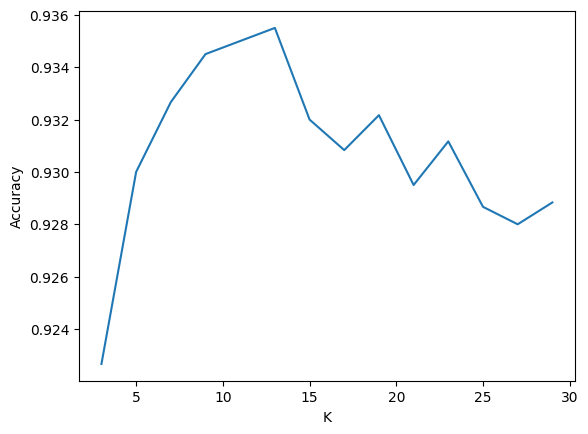

In [ ]:
acc = {}
for k in range(3, 30, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    acc[k] = accuracy_score(y_test, y_pred)

# PLotting K v/s accuracy graph
plt.plot(range(3,30,2), acc.values())
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.show()

# Simple Linear Regression

In [ ]:
import pandas as pd

In [ ]:
# Reading csv file from github repo
advertising = pd.read_csv('drive/MyDrive/Datasets/tvmarketing.csv')

In [ ]:
# Display the first 5 rows
advertising.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [ ]:
# Display the last 5 rows
advertising.tail()

,TV,Sales
195,38.2,7.6
196,94.2,9.7
197,177.0,12.8
198,283.6,25.5
199,232.1,13.4


In [ ]:
# Let's check the columns
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Sales   200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


In [ ]:
# Check the shape of the DataFrame (rows, columns)
advertising.shape

(200, 2)

In [ ]:
# Let's look at some statistical information about the dataframe.
advertising.describe()

,TV,Sales
count,200.000000,200.000000
mean,147.042500,14.022500
std,85.854236,5.217457
min,0.700000,1.600000
25%,74.375000,10.375000
50%,149.750000,12.900000
75%,218.825000,17.400000
max,296.400000,27.000000


<Axes: xlabel='TV', ylabel='Sales'>

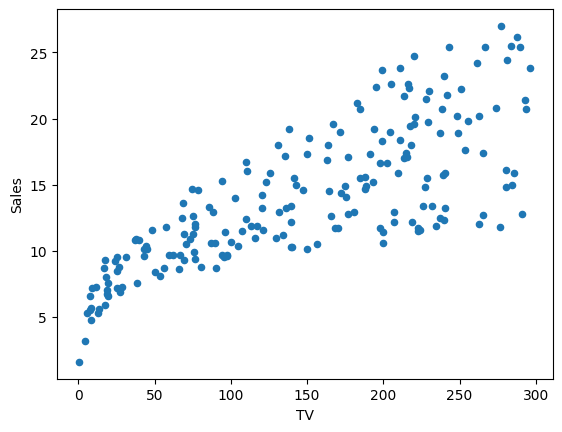

In [ ]:
# Visualise the relationship between the features and the response using scatterplots
advertising.plot(x='TV',y='Sales',kind='scatter')

In [ ]:
# Putting feature variable to X
X = advertising['TV']

# Print the first 5 rows
X.head()

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [ ]:
# Putting response variable to y
y = advertising['Sales']

# Print the first 5 rows
y.head()

,Sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [ ]:
#random_state is the seed used by the random number generator, it can be any integer.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 , random_state=0000)

In [ ]:
print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_test))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [ ]:
train_test_split
#Press Tab+Shift to read the documentation

<function sklearn.model_selection._split.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)>

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(140,)
(140,)
(60,)
(60,)


In [ ]:
(140)
(140)
(60)
(60)
#It is a general convention in scikit-learn that observations are rows, while features are columns.
#This is needed only when you are using a single feature; in this case, 'TV'.

import numpy as np
#Simply put, numpy.newaxis is used to increase the dimension of the existing array by one more dimension,
X_train = X_train.values[:, np.newaxis]
X_test = X_test.values[:, np.newaxis]

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(140, 1)
(140,)
(60, 1)
(60,)


In [ ]:
# import LinearRegression from sklearn
from sklearn.linear_model import LinearRegression

# Representing LinearRegression as lr(Creating LinearRegression Object)
lr = LinearRegression()

# Fit the model using lr.fit()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Print the intercept and coefficients
print(lr.intercept_)
print(lr.coef_)

7.310810165411681
[0.04581434]


In [ ]:
# Making predictions on the testing set
y_pred = lr.predict(X_test)

In [ ]:
type(y_pred)

numpy.ndarray

In [ ]:
y_test.shape # cheek the shape to generate the index for plot

(60,)

Text(0, 0.5, 'Sales')

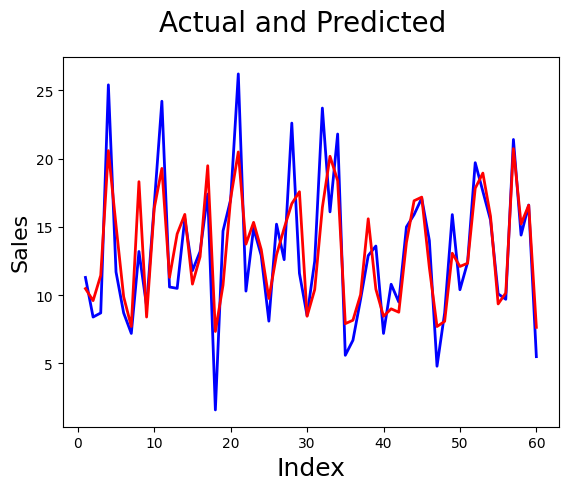

In [ ]:
# Actual vs Predicted
import matplotlib.pyplot as plt
c = [i for i in range(1,61,1)]         # generating index
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=2, linestyle="-")
plt.plot(c,y_pred, color="red",  linewidth=2, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Sales', fontsize=16)                       # Y-label

Text(0, 0.5, 'ytest-ypred')

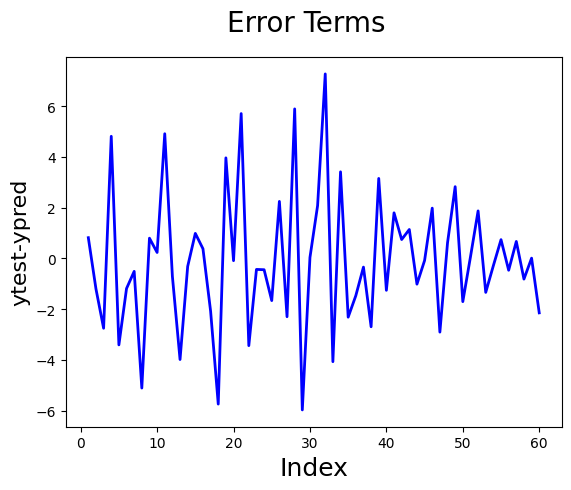

In [ ]:
# Error terms
c = [i for i in range(1,61,1)]
fig = plt.figure()
plt.plot(c,y_test-y_pred, color="blue", linewidth=2, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('ytest-ypred', fontsize=16)                # Y-label

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)

In [ ]:
r_squared = r2_score(y_test, y_pred)

In [ ]:
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 7.497479593464674
r_square_value : 0.725606346597073


In [ ]:
# this mse =7.9 means that this model is not able to match the 7.9 percent of the values
# r2 means that your model is 72% is accurate on test data .

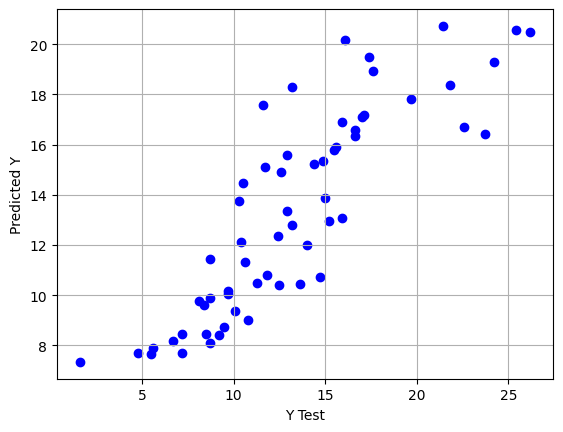

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred,c='blue')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.grid()

# SVM Linear - Ejercicio #1

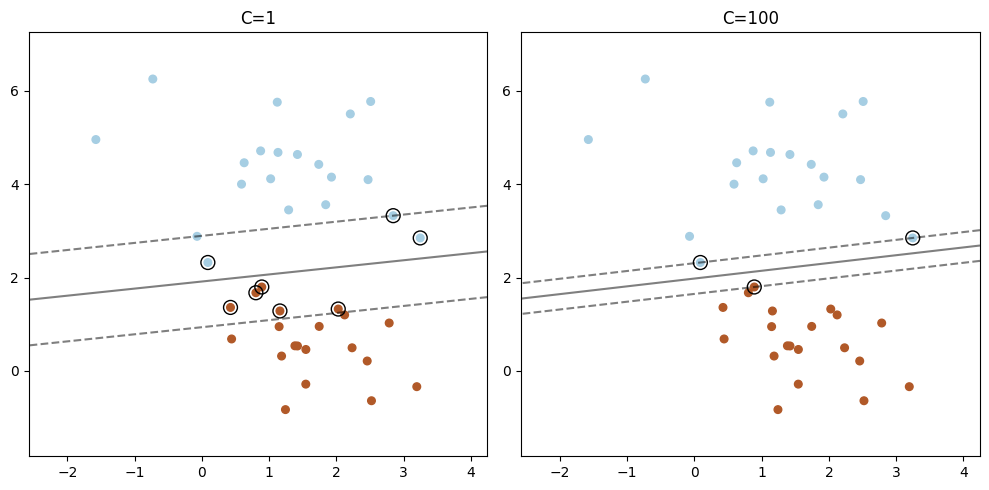

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import make_blobs
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.svm import LinearSVC

X, y = make_blobs(n_samples=40, centers=2, random_state=0)

plt.figure(figsize=(10, 5))
for i, C in enumerate([1, 100]):
    # "hinge" is the standard SVM loss
    clf = LinearSVC(C=C, loss="hinge", random_state=42).fit(X, y)
    # obtain the support vectors through the decision function
    decision_function = clf.decision_function(X)
    # we can also calculate the decision function manually
    # decision_function = np.dot(X, clf.coef_[0]) + clf.intercept_[0]
    # The support vectors are the samples that lie within the margin
    # boundaries, whose size is conventionally constrained to 1
    support_vector_indices = (np.abs(decision_function) <= 1 + 1e-15).nonzero()[0]
    support_vectors = X[support_vector_indices]

    plt.subplot(1, 2, i + 1)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
    ax = plt.gca()
    DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        ax=ax,
        grid_resolution=50,
        plot_method="contour",
        colors="k",
        levels=[-1, 0, 1],
        alpha=0.5,
        linestyles=["--", "-", "--"],
    )
    plt.scatter(
        support_vectors[:, 0],
        support_vectors[:, 1],
        s=100,
        linewidth=1,
        facecolors="none",
        edgecolors="k",
    )
    plt.title("C=" + str(C))
plt.tight_layout()
plt.show()

# SVM Linear - Ejercicio #2

In [1]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

# Preprocesado y modelado
# ==============================================================================
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Datos
# ==============================================================================
url = 'https://raw.githubusercontent.com/JoaquinAmatRodrigo/' \
       + 'Estadistica-machine-learning-python/master/data/ESL.mixture.csv'
datos = pd.read_csv(url)
datos.head(3)

,X1,X2,y
0,2.526093,0.321050,0
1,0.366954,0.031462,0
2,0.768219,0.717486,0


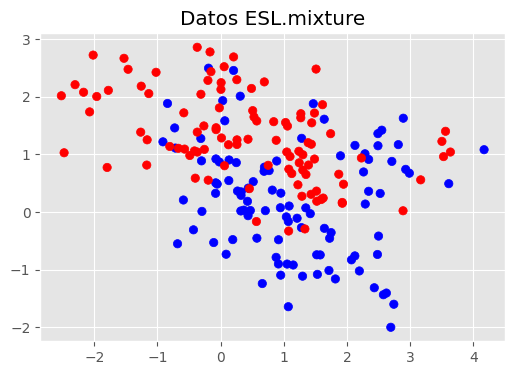

In [3]:
fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(datos.X1, datos.X2, c=datos.y);
ax.set_title("Datos ESL.mixture");

In [4]:
# División de los datos en train y test
# ==============================================================================
X = datos.drop(columns = 'y')
y = datos['y']

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [5]:
# Creación del modelo SVM lineal
# ==============================================================================
modelo = SVC(C = 100, kernel = 'linear', random_state=123)
modelo.fit(X_train, y_train)

SVC(C=100, kernel='linear', random_state=123)

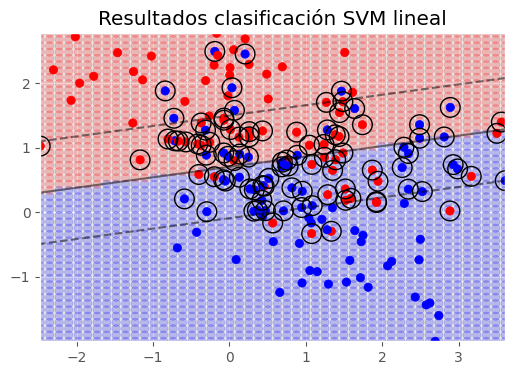

In [6]:
# Representación gráfica de los límites de clasificación
# ==============================================================================
# Grid de valores
x = np.linspace(np.min(X_train.X1), np.max(X_train.X1), 50)
y = np.linspace(np.min(X_train.X2), np.max(X_train.X2), 50)
Y, X = np.meshgrid(y, x)
grid = np.vstack([X.ravel(), Y.ravel()]).T

# Predicción valores grid
pred_grid = modelo.predict(grid)

fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(grid[:,0], grid[:,1], c=pred_grid, alpha = 0.2)
ax.scatter(X_train.X1, X_train.X2, c=y_train, alpha = 1)

# Vectores soporte
ax.scatter(
    modelo.support_vectors_[:, 0],
    modelo.support_vectors_[:, 1],
    s=200, linewidth=1,
    facecolors='none', edgecolors='black'
)

# Hiperplano de separación
ax.contour(
    X,
    Y,
    modelo.decision_function(grid).reshape(X.shape),
    colors = 'k',
    levels = [-1, 0, 1],
    alpha  = 0.5,
    linestyles = ['--', '-', '--']
)

ax.set_title("Resultados clasificación SVM lineal");

In [7]:
# Predicciones test
# ==============================================================================
predicciones = modelo.predict(X_test)
predicciones

array([1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0])

In [8]:
# Accuracy de test del modelo
# ==============================================================================
accuracy = accuracy_score(
            y_true    = y_test,
            y_pred    = predicciones,
            normalize = True
           )
print("")
print(f"El accuracy de test es: {100*accuracy}%")


El accuracy de test es: 70.0%


# SVM Radial (Tarea de Investigar)

In [ ]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style

# Preprocesado y modelado
# ==============================================================================
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Datos
# ==============================================================================
url = 'https://raw.githubusercontent.com/JoaquinAmatRodrigo/' \
       + 'Estadistica-machine-learning-python/master/data/ESL.mixture.csv'
datos = pd.read_csv(url)
datos.head(3)

,X1,X2,y
0,2.526093,0.321050,0
1,0.366954,0.031462,0
2,0.768219,0.717486,0


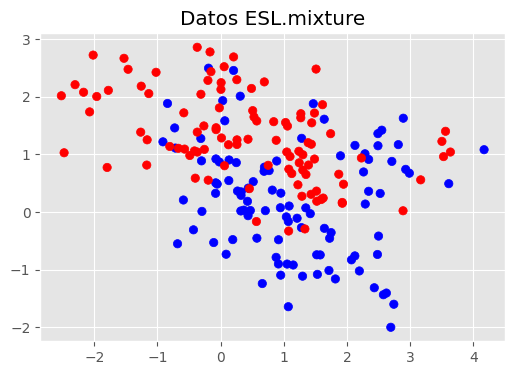

In [ ]:
fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(datos.X1, datos.X2, c=datos.y);
ax.set_title("Datos ESL.mixture");

In [ ]:
# División de los datos en train y test
# ==============================================================================
X = datos.drop(columns = 'y')
y = datos['y']

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [ ]:
# Grid de hiperparámetros
# ==============================================================================
param_grid = {'C': np.logspace(-5, 7, 20)}

# Búsqueda por validación cruzada
# ==============================================================================
grid = GridSearchCV(
        estimator  = SVC(kernel= "rbf", gamma='scale'),
        param_grid = param_grid,
        scoring    = 'accuracy',
        n_jobs     = -1,
        cv         = 3,
        verbose    = 0,
        return_train_score = True
      )

# Se asigna el resultado a _ para que no se imprima por pantalla
_ = grid.fit(X = X_train, y = y_train)

# Resultados del grid
# ==============================================================================
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False) \
    .head(5)

,param_C,mean_test_score,std_test_score,mean_train_score,std_train_score
8,1.128838,0.762520,0.023223,0.790778,0.035372
12,379.269019,0.750641,0.076068,0.868777,0.007168
7,0.263665,0.750175,0.030408,0.778228,0.026049
9,4.832930,0.744118,0.044428,0.815729,0.026199
11,88.586679,0.738062,0.064044,0.859431,0.019840


In [ ]:
# Mejores hiperparámetros por validación cruzada
# ==============================================================================
print("----------------------------------------")
print("Mejores hiperparámetros encontrados (cv)")
print("----------------------------------------")
print(grid.best_params_, ":", grid.best_score_, grid.scoring)

modelo = grid.best_estimator_

----------------------------------------
Mejores hiperparámetros encontrados (cv)
----------------------------------------
{'C': np.float64(1.1288378916846884)} : 0.7625203820172374 accuracy


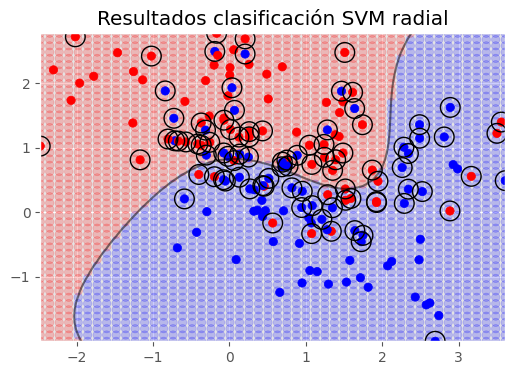

In [ ]:
# Representación gráfica de los límites de clasificación
# ==============================================================================
# Grid de valores
x = np.linspace(np.min(X_train.X1), np.max(X_train.X1), 50)
y = np.linspace(np.min(X_train.X2), np.max(X_train.X2), 50)
Y, X = np.meshgrid(y, x)
grid = np.vstack([X.ravel(), Y.ravel()]).T

# Predicción valores grid
pred_grid = modelo.predict(grid)

fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(grid[:,0], grid[:,1], c=pred_grid, alpha = 0.2)
ax.scatter(X_train.X1, X_train.X2, c=y_train, alpha = 1)

# Vectores soporte
ax.scatter(
    modelo.support_vectors_[:, 0],
    modelo.support_vectors_[:, 1],
    s=200, linewidth=1,
    facecolors='none', edgecolors='black'
)

# Hiperplano de separación
ax.contour(
    X,
    Y,
    modelo.decision_function(grid).reshape(X.shape),
    colors='k',
    levels=[0],
    alpha=0.5,
    linestyles='-'
)

ax.set_title("Resultados clasificación SVM radial");

In [ ]:
# Predicciones test
# ==============================================================================
predicciones = modelo.predict(X_test)

In [ ]:
# Accuracy de test del modelo
# ==============================================================================
accuracy = accuracy_score(
            y_true    = y_test,
            y_pred    = predicciones,
            normalize = True
           )
print("")
print(f"El accuracy de test es: {100*accuracy}%")


El accuracy de test es: 80.0%


# Back Propagation (Tarea de Investigación)

In [13]:
# PACKAGE
import numpy as np

In [14]:
import matplotlib.pyplot as plt
from matplotlib import cbook
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
#import seaborn as sns

In [15]:
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [16]:
training_data = pd.read_csv("drive/MyDrive/Datasets/train.csv")
training_data = training_data.values

In [17]:
length = training_data.shape[0]
length
training_length = round(0.7*(length))
#dev_length = round(0.8*(length))
x_train = training_data[:training_length,1:].T
y_train = training_data[:training_length,0]

#x_dev = training_data[training_length+1:dev_length,1:].T
#y_dev = training_data[training_length+1:dev_length,0]

x_test = training_data[training_length+1:,1:].T
y_test = training_data[training_length+1:,0]



y_train = y_train.reshape(1,len(y_train))
#y_dev = y_dev.reshape(1,len(y_dev))
y_test = y_test.reshape(1,len(y_test))

In [18]:
scaler = MinMaxScaler(feature_range=(0, 1))
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

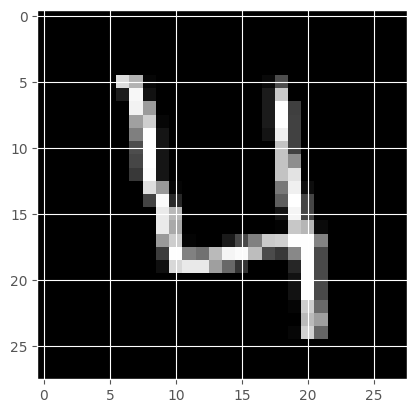

In [19]:
img = x_train[:,3]
img = img.reshape(28,28)
plt.imshow(img,cmap = 'gray')
plt.show()
#y_train[:,3]

In [20]:
count_in_labels = []
for i in range(10):
    idx = y_train == i
    count_in_labels.append(len(y_train[idx]))
    print("Count in label %d is %d"%(i,count_in_labels[i]))

Count in label 0 is 2869
Count in label 1 is 3275
Count in label 2 is 2951
Count in label 3 is 3034
Count in label 4 is 2888
Count in label 5 is 2660
Count in label 6 is 2910
Count in label 7 is 3069
Count in label 8 is 2828
Count in label 9 is 2916


In [21]:
logisticregsr = LogisticRegression(multi_class='multinomial', solver = 'lbfgs')
y_train_l = y_train.ravel()
logisticregsr.fit(x_train.T,y_train_l)

LogisticRegression(multi_class='multinomial')

In [22]:
pred = logisticregsr.predict(x_test.T)
y_test_check = y_test.ravel()
y_train_check = y_train.ravel()
#y_test_check.shape
score_train = logisticregsr.score(x_train.T,y_train_check)*100
print("The accuracy on train data is",score_train,"%")
score_test = logisticregsr.score(x_test.T,y_test_check)*100
print("The accuracy on test data is",score_test,"%")

The accuracy on train data is 94.25850340136054 %
The accuracy on test data is 91.90411937455355 %


In [23]:
c_matrix = confusion_matrix(y_test_check,pred)

In [24]:
print(c_matrix)

[[1217    0    5    2    3    8   15    2   10    1]
 [   0 1374    4    6    1    3    1    4   14    2]
 [   6   12 1093   22   12    7   17   17   35    5]
 [   5    7   38 1172    1   41    5   15   18   14]
 [   4    9    6    3 1098    2   15    3   13   31]
 [  14    7   14   37   16  981   21    4   27   14]
 [   8    3   13    0    8   18 1173    0    4    0]
 [   3    2   16   10   10    3    0 1239    3   46]
 [   8   31    7   33    8   29    8    4 1095   12]
 [   6    5    8   18   32   10    0   45   11 1137]]


In [25]:
def transform_output(y):
    l = y.shape[1]
    ty = np.zeros((10,l))
    for i in range(l):
        s = y[0,i].astype(int)
        # print(type(s))
        ty[s,i] = 1
    return ty

In [26]:
def function(z):
    return np.maximum(0.01*z,z)

In [27]:
def function_prime(z):
    a = np.greater(z,0.01*z)
    a = a.astype(int)
    a[a==0] = 0.01
    return a

In [28]:
def cost_function(y,a,m):
    b = y-a
    s = (1/(2*m))*(np.dot(b.T,b))
    l = s.shape[1]
    dsum = 0
    for i in range(l):
        dsum = dsum + s[i,i]
    return dsum

In [29]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [30]:
def sigmoid_prime(z):
    return sigmoid(z)*(1-sigmoid(z))

In [31]:
def grad_a_cost_function(y,a,m):
    return -(1/m)*(y-a)

In [33]:
class Network:
    # atype is the activation type; whether it is a RELU or sigmoid
    def __init__(self,sizes,atype):
        self.num_layers = len(sizes)
        self.weights = []
        if atype=="sigmoid":
            self.biases = [np.random.randn(y,1) for y in sizes[1:]]
            #self.biases = [np.zeros((y,1)) for y in sizes[1:]]
            #self.weights = [np.zeros((sizes[1],sizes[0]))]
            #self.weights = [np.zeros((sizes[1],sizes[0]))
            for x in range(1,len(sizes)):
                (self.weights).append(np.random.randn(sizes[x],sizes[x-1]))
        else:
            self.biases = [np.zeros((y,1)) for y in sizes[1:]]
            #self.weights = [np.zeros((sizes[1],sizes[0]))]
            for x in range(1,len(sizes)):
                (self.weights).append(np.random.randn(sizes[x],sizes[x-1])*np.sqrt(2/sizes[x-1]))
    def feedforward(self, batch_x):
        length = len(self.weights)
        a_cache=[]
        a = batch_x
        a_cache.append(a)
        z_cache=[]
        for i in range(length-1):
            z = np.dot(self.weights[i],a) + self.biases[i]
            z_cache.append(z)
            a = function(z)
            a_cache.append(a)
        i=i+1
        z = np.dot(self.weights[i],a) + self.biases[i]
        z_cache.append(z)
        a = sigmoid(z)
        a_cache.append(a)
        return a_cache,z_cache

    def feedforward_output(self, x_test):
        length = len(self.weights)
        a = x_test
        for i in range(length-1):
            z = np.dot(self.weights[i],a) + self.biases[i]
            a = function(z)
            #print("z[",i,"] = ",z)
        i = i + 1
        z = np.dot(self.weights[i],a) + self.biases[i]
        #print("z[",i,"] = ",z)
        a = sigmoid(z)
        return a
    def compute_dZ(self,batch_x,batch_y,l,Z_cache,dZ):
        m = batch_x.shape[1]
        n = batch_x.shape[0]
        #y = batch[n-1,:]
        #y = y.reshape(1,len(y))
        # print(type(y))
        #print(y.shape)
        #y = transform_output(y)
        if l== self.num_layers - 2:
            #a = function(Z_cache[l])
            a = sigmoid(Z_cache[l])
            #return grad_a_cost_function(batch_y,a,m)*function_prime(Z_cache[l])
            return grad_a_cost_function(batch_y,a,m)*sigmoid_prime(Z_cache[l])
        else:
            return np.dot(self.weights[l+1].T,dZ)*function_prime(Z_cache[l])

    def backpropagation(self,batch_x,batch_y):
        dw = []
        db = []
        m = batch_x.shape[1]
        A_cache,Z_cache = self.feedforward(batch_x)
        L = self.num_layers
        dZ = []
        for l in range(L-2,-1,-1):
            dZ = self.compute_dZ(batch_x,batch_y,l,Z_cache,dZ)
            db.append((1/m)*np.sum(dZ,axis = 1,keepdims = True))
            dw.append((1/m)*np.dot(dZ,A_cache[l].T))
        db.reverse()
        dw.reverse()
        return dw,db

    def update(self,batch_x,batch_y,eta,vdw,vdb):
        beta = 0.9
        dw,db = self.backpropagation(batch_x,batch_y)

        vdw = [beta*x +(1-beta)*y for (x,y) in zip(vdw,dw)]
        vdb = [beta*x +(1-beta)*y for (x,y) in zip(vdb,db)]
        for i in range(self.num_layers-1):
            #check(dw[i])
            self.weights[i] = self.weights[i] - eta*vdw[i]
            self.biases[i] = self.biases[i] - eta*vdb[i]

        return vdw,vdb

     # we assume that in the training data, rows represent the features of the training set and columns denote the
    # instances of the training set.

    def SGD(self,x_train,y_train,batch_size,no_of_epoch,eta,x_test=None,y_test=None):
        training_data = x_train
        print(training_data.shape)
        print(y_train.shape)
        training_data = np.append(training_data,y_train,axis = 0)
        print(training_data.shape)
        # In the previous two lines, we have put x_train and y_train into one matrix: training data;
        #training_data = [[x_train],
        #                 [ytrain]]
        n = training_data.shape[0]
        training_size = training_data.shape[1]
        vdw = [np.zeros(y.shape) for y in self.weights]
        vdb = [np.zeros(y.shape) for y in self.biases]
        for i in range(no_of_epoch):
            np.random.shuffle(training_data.T)
            x_train_shuffled = training_data[:-1,:]
            y_train_shuffled = training_data[n-1,:]
            y_train_shuffled = y_train_shuffled.reshape(1,len(y_train_shuffled ))
            # print(type(y_train_shuffled))
            y_train_shuffled_transformed = transform_output(y_train_shuffled)
            batches_x = [x_train_shuffled[:,k:k + batch_size] for k in range(0,training_size,batch_size)]
            batches_y = [y_train_shuffled_transformed[:,k:k + batch_size] for k in range(0,training_size,batch_size)]
            for (batch_x,batch_y) in zip(batches_x,batches_y):
                vdw,vdb = self.update(batch_x,batch_y,eta,vdw,vdb)
            a = self.feedforward_output(x_train[:,1:10])
            m = a.shape[1]
            y = transform_output(y_train[:,1:10])
            cost = cost_function(y,a,m)
            print("The cost after epoch no.",i," is ",cost)
            #a = np.argmax(a,axis = 0)
            #s = score(y_train,a)
            #print(s)


In [34]:
n = Network([784,30,30,10],"RELU")
n.SGD(x_train,y_train,10,50,0.5)

(784, 29400)
(1, 29400)
(785, 29400)
The cost after epoch no. 0  is  0.046542918732000345
The cost after epoch no. 1  is  0.038253292760126865
The cost after epoch no. 2  is  0.027625546008886608
The cost after epoch no. 3  is  0.009393233595013548
The cost after epoch no. 4  is  0.0061086329342607435
The cost after epoch no. 5  is  0.004211094420572145
The cost after epoch no. 6  is  0.003816435423828829
The cost after epoch no. 7  is  0.0024196365494349673
The cost after epoch no. 8  is  0.0035240997595904194
The cost after epoch no. 9  is  0.001335606779791131
The cost after epoch no. 10  is  0.002579610607731745
The cost after epoch no. 11  is  0.002523960445908888
The cost after epoch no. 12  is  0.004387907130665596
The cost after epoch no. 13  is  0.0016798476801105826
The cost after epoch no. 14  is  0.0021184694851918897
The cost after epoch no. 15  is  0.001244552218490801
The cost after epoch no. 16  is  0.0028934930610504802
The cost after epoch no. 17  is  0.00079636860478

In [35]:
img = x_test[:,7]

(784, 1)


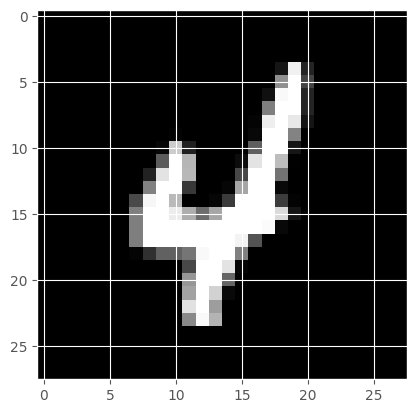

The predicted output is [4]


In [36]:
img = img.reshape(len(img),1)
A_test= n.feedforward_output(img)
A_test = np.argmax(A_test,axis=0)
print(img.shape)
img = img.reshape(28,28)
plt.imshow(img,cmap = 'gray')
plt.show()
print("The predicted output is", A_test)

# Simple Neural Network: Perceptron

In [ ]:
import tensorflow as tf

import numpy as np
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [ ]:
celsius_q = np.array([-40, -10,  0,  8, 15, 22,  38, 66, 34], dtype = float)
fahrenheit_a = np.array([-40,  14, 32, 46, 59, 72, 100, 150.8, 93.2],  dtype=float)

In [ ]:
for i,c in enumerate(celsius_q):
  print("{} Degree Celcius = {} Degree Farenheit".format(c, fahrenheit_a[i]))

-40.0 Degree Celcius = -40.0 Degree Farenheit
-10.0 Degree Celcius = 14.0 Degree Farenheit
0.0 Degree Celcius = 32.0 Degree Farenheit
8.0 Degree Celcius = 46.0 Degree Farenheit
15.0 Degree Celcius = 59.0 Degree Farenheit
22.0 Degree Celcius = 72.0 Degree Farenheit
38.0 Degree Celcius = 100.0 Degree Farenheit
66.0 Degree Celcius = 150.8 Degree Farenheit
34.0 Degree Celcius = 93.2 Degree Farenheit


In [ ]:
l0 = tf.keras.layers.Dense(units = 1, input_shape=[1])
model = tf.keras.Sequential([l0])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(loss="mean_squared_error", optimizer = tf.keras.optimizers.Adam(0.1))
history = model.fit(celsius_q, fahrenheit_a, epochs = 500, verbose=False)
print("Finished training the model")

Finished training the model


In [ ]:
print(model.predict(np.array([100.0])))
print("These are the layer variables: {}".format(l0.get_weights()))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
[[213.7916]]
These are the layer variables: [array([[1.8618982]], dtype=float32), array([27.601772], dtype=float32)]


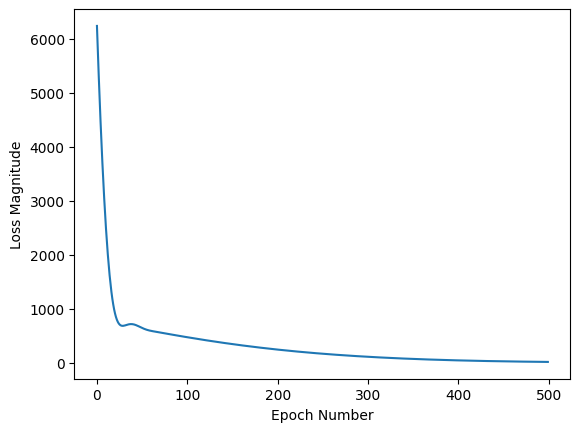

In [ ]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])

# Neural Network: Binary Classifier

In [ ]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

In [ ]:
from sklearn.datasets import load_breast_cancer

In [ ]:
cancer_data = load_breast_cancer()
list(cancer_data.feature_names)

[np.str_('mean radius'),
 np.str_('mean texture'),
 np.str_('mean perimeter'),
 np.str_('mean area'),
 np.str_('mean smoothness'),
 np.str_('mean compactness'),
 np.str_('mean concavity'),
 np.str_('mean concave points'),
 np.str_('mean symmetry'),
 np.str_('mean fractal dimension'),
 np.str_('radius error'),
 np.str_('texture error'),
 np.str_('perimeter error'),
 np.str_('area error'),
 np.str_('smoothness error'),
 np.str_('compactness error'),
 np.str_('concavity error'),
 np.str_('concave points error'),
 np.str_('symmetry error'),
 np.str_('fractal dimension error'),
 np.str_('worst radius'),
 np.str_('worst texture'),
 np.str_('worst perimeter'),
 np.str_('worst area'),
 np.str_('worst smoothness'),
 np.str_('worst compactness'),
 np.str_('worst concavity'),
 np.str_('worst concave points'),
 np.str_('worst symmetry'),
 np.str_('worst fractal dimension')]

In [ ]:
# the dataset contain the following labels

cancer_data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [ ]:
# Getting features and labels

X = cancer_data.data
y = cancer_data.target

In [ ]:
# the features and labels are numpy array

type(X)

numpy.ndarray

In [ ]:
# To quickly look in data we can get the dataframe from X

data_df = pd.DataFrame(X, columns=cancer_data.feature_names)

In [ ]:
# Looking from the head

data_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
# Getting the basic information

data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
# Getting the basic stats

data_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, shuffle=True, random_state=42)

In [ ]:
print('The number of training samples: {}\nThe number of testing samples: {}'.format(X_train.shape[0], X_test.shape[0]))

The number of training samples: 455
The number of testing samples: 114


In [ ]:
# Scaling the features to be between 0 and 1.

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)

In [ ]:
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Creating a model

# Getting the input shape

input_shape = X_train_scaled.shape[1:]

model_1 = tf.keras.models.Sequential([

              # The first layer has 30 neurons(or units)
              tf.keras.layers.Dense(units=30, input_shape=input_shape, activation='relu'),

              # The second layer has 25 neurons

              tf.keras.layers.Dense(units=15, activation='relu'),

              # The third layer has 1 neuron and activation of sigmoid.
              # Because of sigmoid, the output of this layer will be a value bwteen 0 and 1
              tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compiling the model

model_1.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [ ]:
# By setting validation_split=0.15, I am allocating 15% of the dataset to be used for evaluating the model during the training
# Model training returns model history(accuracy, loss, epochs...)

history = model_1.fit(X_train_scaled, y_train, epochs=60, validation_split=0.15)

Epoch 1/60
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.4354 - loss: 0.6922 - val_accuracy: 0.5942 - val_loss: 0.6877
Epoch 2/60
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7720 - loss: 0.6769 - val_accuracy: 0.6957 - val_loss: 0.6744
Epoch 3/60
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7308 - loss: 0.6635 - val_accuracy: 0.6522 - val_loss: 0.6642
Epoch 4/60
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6973 - loss: 0.6515 - val_accuracy: 0.6812 - val_loss: 0.6563
Epoch 5/60
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7098 - loss: 0.6436 - val_accuracy: 0.6812 - val_loss: 0.6481
Epoch 6/60
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7210 - loss: 0.6393 - val_accuracy: 0.6812 - val_loss: 0.6397
Epoch 7/60
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7075 - loss: 0.6322 - val_accuracy: 0.7101 - val_loss: 0.6327
Epoch 8/60
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7648 - loss: 0.6192 - val_accuracy: 0.6957 - val_loss

# Red Neuronal Convolusional

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 11s 0us/step


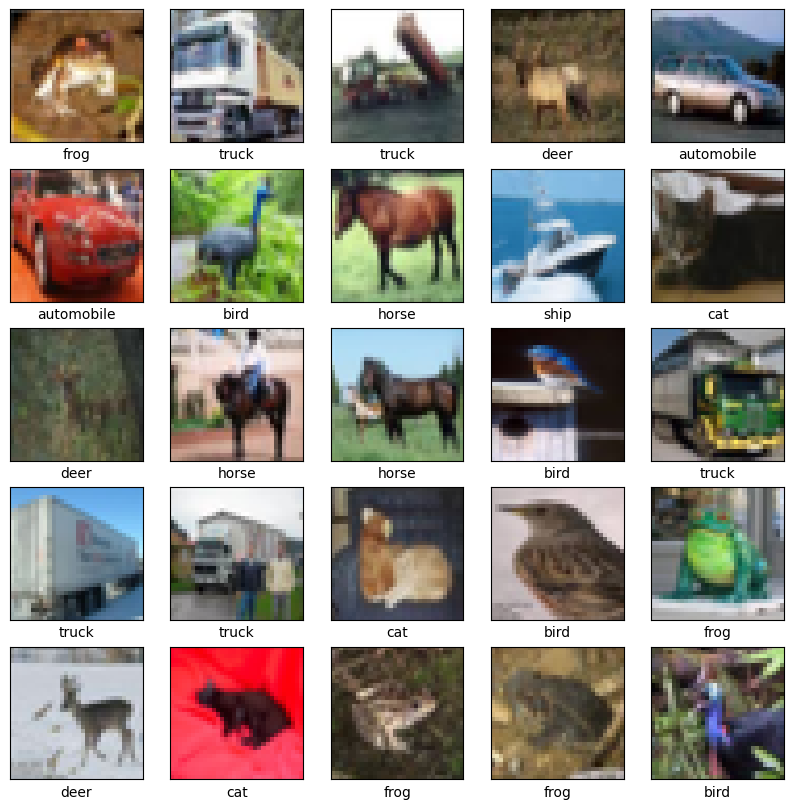

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 58s 36ms/step - accuracy: 0.3629 - loss: 1.7281 - val_accuracy: 0.5375 - val_loss: 1.2706
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 54s 35ms/step - accuracy: 0.5826 - loss: 1.1875 - val_accuracy: 0.6288 - val_loss: 1.0796
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 33ms/step - accuracy: 0.6458 - loss: 1.0069 - val_accuracy: 0.6674 - val_loss: 0.9622
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 86s 36ms/step - accuracy: 0.6826 - loss: 0.9010 - val_accuracy: 0.6800 - val_loss: 0.9303
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 57s 36ms/step - accuracy: 0.7117 - loss: 0.8181 - val_accuracy: 0.6852 - val_loss: 0.9116
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 54s 35ms/step - accuracy: 0.7311 - loss: 0.7573 - val_accuracy: 0.6942 - val_loss: 0.8854
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 56s 36ms/step - accuracy: 0.7507 - loss: 0.7077 - val_accuracy: 0.6848 - val_loss: 0.9636
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 64s 41ms/step - accuracy: 0.7658 -

313/313 - 5s - 17ms/step - accuracy: 0.7164 - loss: 0.8537


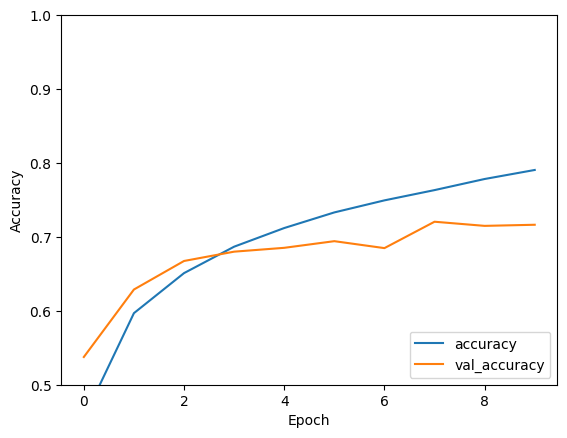

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [ ]:
print(test_acc)

0.7164000272750854
